# Classical linear elastostatics

In this demo we discretize the classical linear elatostatics equations using the Galerkin method based on isogeometric function spaces. We follow the notation used in [1]. A more mathematical view on the finite element method can be found in [2]. Regarding isogeometric analysis we refer to the first paper [3] and the book [4].


[1] Hughes, Thomas JR. The finite element method: linear static and dynamic finite element analysis. *Courier Corporation*, 2012.

[2] Strang, Gilbert, and George J. Fix. An analysis of the finite element method. Vol. 212. *Englewood Cliffs, NJ: Prentice-Hall*, 1973.

[3] Hughes, T.J., Cottrell, J.A. and Bazilevs, Y., 2005. Isogeometric analysis: CAD, finite elements, NURBS, exact geometry and mesh refinement. *Computer methods in applied mechanics and engineering*, 194(39), pp.4135-4195.

[4] Cottrell, J. Austin, Thomas JR Hughes, and Yuri Bazilevs. Isogeometric analysis: toward integration of CAD and FEA. *John Wiley & Sons*, 2009.

[5] Borden, Michael J., et al. "Isogeometric finite element data structures based on Bézier extraction of NURBS." International Journal for Numerical Methods in Engineering 87.1‐5 (2011): 15-47.

## Strong form

Let $n_{sd}(=2,3)$ denote the number of space dimensions. In the following, indices $i,j,k,l$ take on the values of $1,2,...,n_{sd}$ and the summation convention applies to repeated indices $i,j,k,l$ only. Let $\Omega$ be an open set with piecewise smooth boundary $\Gamma$. The present theory is vector valued (the unknown is the displacement vector). Consequently a generalization of the boundary conditions is necessitated. Assume $\Gamma$ admits the decomposition,

\begin{align} \text{for } i = 1,2,...,n_{sd} \quad
\begin{cases}
    \Gamma = \overline{ \Gamma_{g_i} \cup \Gamma_{h_i}} \\
    \emptyset = \Gamma_{g_i} \cap \Gamma_{h_i} \\
\end{cases}
\end{align}

Furthermore, let $\mathbf{n}$ denote the unit outward normal to $\Gamma$ with components $n_i$, $i=1,2,...,n_{sd}$.

Let $\sigma_{ij}$ denote the components of the Cauchy stress tensor, let $u_i$ denote the components of displacement vector and let $f_i$ be the prescribed body force vector per unit of volume in the $i$th coordinate direction. The infinitesimal strain tensor, $\epsilon_{ij}$, is defined to be the symmetric part of the displacement gradient,
\begin{align} 
    \epsilon_{ij} &= u_{(i,j)} \stackrel{def}{=} \frac{u_{i,j} + u_{j,i}}{2}      & (1.1) \\
\end{align}

The Cauchy stress tensor is given in terms of the strain tensor through the following constitutive equation, known as the generalized Hooke's law,
\begin{align} 
    \sigma_{ij} &= c_{ijkl} \; \epsilon_{kl}      & (1.2) \\
\end{align}

The elastic coefficients, $c_{ijkl}$, are known functions of $x$. Together they form the 4th order stiffness tensor  $\mathbf{c}=[c_{ijkl}]$, which is assumed symmetric,
\begin{align} 
    c_{ijkl} &= c_{klij} & (\text{Major symmetry}) \\
    c_{ijkl} &= c_{jikl} & (\text{1st minor symmetry}) \\
    c_{ijkl} &= c_{ijlk} & (\text{2nd minor symmetry})
\end{align}

and positive definite
\begin{align} 
    \psi_{ij} c_{ijkl} \psi_{kl} &\geq 0   \quad \text{for all symmetric $n_{sd} \times n_{sd}$ matrices } \psi_{ij} \\
    \psi_{ij} c_{ijkl} \psi_{kl} &= 0 \; \implies \; \psi_{ij} = 0
\end{align}

Formal statement of the strong form: 

(S) given $f_i \; : \; \Omega \mapsto \mathbb{R}$, $g_i \; : \; \Gamma_{g_i} \mapsto \mathbb{R}$ and $h_{i} \; : \; \Gamma_{h_i} \mapsto \mathbb{R}$, find $u_i \; : \; \overline{\Omega} \mapsto \mathbb{R}$ such that
\begin{align} 
    \sigma_{ij,j} &= f_i \quad \text{in } \Omega      & (1.3)\\
          u_i &= g_i \quad \text{on } \Gamma_{g_i}    & (1.4)\\
   \sigma_{ij} \; n_j &= h_i \quad \text{on } \Gamma_{h_i} & (1.5)
\end{align}

where $\sigma_{ij}$ is given in terms of $u_i$ by (1.1-1.2). The boundary constraints $g_i$ and $h_i$ are the prescribed boundary displacement and traction, respectively.

## Weak form

Let $\mathcal{S} = \left\{ u \; | \; u_i \in \mathcal{S}_i \right\}$ denote the trial solution space and $\mathcal{V} = \left\{ w \; | \; w_i \in \mathcal{V}_i \right\}$ the variation or test-space. These spaces contain real valued functions with certain regularity and essential boundary constraints build into their definition,


\begin{align}
    \mathcal{S}_i &:= \left\{ u_i \in H^1(\Omega) \; | \;  u_i  = g_i \; \text{on } \Gamma_{g_i} \right\} & (2.1)\\
    \mathcal{V}_i &:= \left\{ w_i \in H^1(\Omega) \; | \;  w_i  = 0 \; \text{on } \Gamma_{g_i} \right\} & (2.2)
\end{align}

The weak formulation corresponding to equation (1.2-1.5) is given by,

(W) given $f_i \; : \; \Omega \mapsto \mathbb{R}$, $g_i \; : \; \Gamma_{g_i} \mapsto \mathbb{R}$ and $h_i \; : \; \Gamma_{h_i} \mapsto \mathbb{R}$, find $u \in \mathcal{S}$ such that,

\begin{align} 
    a(w,u) = (w,f) + (w,h)_{\Gamma} \quad \text{for all } w \in \mathcal{V}   & & (2.3)
\end{align}

where,

\begin{align} 
    & a(w,u) = - \int_{\Omega} w_{(i,j)} c_{ijkl} u_{(k,l)} d\Omega, &
    & (w,f) = \int_{\Omega} w_i f_i d\Omega,& 
    & (w,h)_{\Gamma} = \sum_{i=1}^{n_{sd}}\int_{\Gamma_{h_i}} w_i h_i d \Gamma & 
\end{align}


## Galerkin formulation

Let $\mathcal{S}^h$ and $\mathcal{V}^h$ denote finite dimensional subspaces of $\mathcal{S}$ and $\mathcal{V}$, respectively. We assume that each member of $\mathcal{V}_i^h$ vanishes on $\Gamma_{g_i}$ and that each member of $\mathcal{S}^h$ admits the representation,


\begin{align}
    u^h &= v^h + g^h & (3.1)
\end{align}

where $v^h \in \mathcal{V}^h$ and $g^h$ satisfies or approximates the boundary condition $u_i=g_i$ on $\Gamma_{g_i}$ for $i=1,2,...,n_{sd}$.

The Galerkin formulation reads,

(G) given $f_i \; : \; \Omega \mapsto \mathbb{R}$, $g_i \; : \; \Gamma_{g_i} \mapsto \mathbb{R}$ and $h_i \; : \; \Gamma_{h_i} \mapsto \mathbb{R}$, find $u^h = v^h +g^h \in \mathcal{S}^h$ such that

\begin{align} 
    a(w^h,v^h) &= (w^h,f) + (w^h,h)_{\Gamma} - a(w^h,g^h)  \quad \text{for all } w^h \in \mathcal{V^h} & (3.2)
\end{align}

## IsoGeometric Analysis

Let $\eta := \left\{1,2,...,n_{np}   \right\}$ be an index set with global node numbers, where $n_{np}$ is the number of nodal points. Among this set of indices, let $\eta_{g_i} \subset \eta $ denote the global node numbers of nodes whose physical location is on $\Gamma_{g_i}$ and whose value is determined by the boundary condition $u_i^h = g_i$. The complement, $\eta - \eta_{g_i}$, refers to the set of nodes at which $u_i^h$ needs to be determined. The explicit representation of $v_i^h$

\begin{align}
    & w_i^h(x) = \sum_{A \in \eta -\eta_{g_i}} N_A(x) c_{iA}, &
    & v_i^h(x) = \sum_{A \in \eta -\eta_{g_i}} N_A(x) d_{iA}, &
    & g_i^h(x) = \sum_{A \in \eta_{g_i}} N_A(x) g_{iA} &
\end{align}



In this demo the set of functions, $N_A(x), \; A \in \eta$, is given in terms of non-uniform rational B-splines (NURBS), which represent the facto standard in computer aided design (CAD). By employing the same basis function technology in finite element analysis as is already in use in the representation of geometry in CAD, we are able to 
* integrate geometry and analysis into one such that the tedious and labour intensive meshing process, that transforms a CAD-geometry into a finite element model can be eliminated. This is still a hot research topic since current CAD-technology is in many cases not directly analysis suitable.
* represent the geometric model exactly from the coarsest level of discretization onwards
* h- and p- and k-refine the model without altering the geometry
* make use of high order smoothness in analysis

The advantages of high order continuity in simulations has been shown in many different applications, most notably contact problems, higher order PDE's and hyperbolic problems such as elastodynamics and wave propagation, see [4]. Furthermore, in cases where the solution is the geometry, as in elasto-statics and elasto-dynamics, the use of isogeometric analyis goes without saying.

Several different discretization techniques have been used in conjuction with isogeometric shape functions. Amongst others, collocation and Galerkin type of finite element methods. In this demo we focus on the Bubnov Galerkin method using NURBS shapefunctions applied to classical elastostatics.

## Initialization: setting the path, install and loading external libraries, 

In [1]:
# addpath library path
push!(LOAD_PATH, "/Users/rene/Box Sync/MultiPhysicsLab/Julia0.4.2/")

3-element Array{ByteString,1}:
 "/Applications/Julia-0.4.2.app/Contents/Resources/julia/local/share/julia/site/v0.4"
 "/Applications/Julia-0.4.2.app/Contents/Resources/julia/share/julia/site/v0.4"      
 "/Users/rene/Box Sync/MultiPhysicsLab/Julia0.4.2/"                                  

### Run the following command when running this code for the first time

In [2]:
Pkg.add("PyCall"); Pkg.add("PyPlot"); Pkg.add("FastGaussQuadrature")

### Load external libraries

In [2]:
using PyCall, PyPlot, FastGaussQuadrature, IGA

## Shapefunction routines

Below you find shape function routines for one- and two dimensional NURBS basisfunctions. The two-dimensional routines are required in the evaluation of domain integrals and in postprocessing of the results. The one-dimensional routines are required in evaluation of the domain integrals. These functions make use of Bernstein polynomials and their derivatives, called in the following piece of code, and Bezier extraction, see [5].

In [3]:
# bernstein basis functions on [-1,1] and their derivatives
dersbezierbasisfuns(p::Int, u::Float64, nout::Int) = dersbsplinebasisfuns(p, buildvector([-1.0;1.0],[p+1;p+1]), p+1, u, nout)'

# bernstein basis functions on [-1,1] and their derivatives at a set of points u
function dersbezierbasisfuns(p::Int, u::Vector{Float64}, nout::Int)
    ϕ = zeros(p+1,length(u),nout) 
    for k in 1:length(u)
        ϕ[:,k,:] = dersbezierbasisfuns(p, u[k], nout)
    end
    return ϕ
end

dersbezierbasisfuns (generic function with 2 methods)

Given a set of Bernstein polynomials, $\phi = \left\{ϕ_i, \; i=1,2,... \right\}$, and their derivatives, $d\phi = \left\{dϕ_i, \; i=1,2,... \right\}$ on $[-1,1]$, we can use Bezier extraction to contruct the corresponding B-spline basis functions and their derivatives. 

Let $C$ denote the Bezier extraction operator on element $k$, then
\begin{align}
        &B = C^T \phi & &\text{and }& &dB = C^T d\phi&
\end{align}

are the one dimensional B-spline basis functions $B = \left\{B_i, \; i=1,2,... \right\}$ and its derivatives $dB = \left\{dB_i, \; i=1,2,... \right\}$ on that element

The kronecker product can be used to compute multivariate B-spline representattions, if required. Let $B^w_{a}(x) = w_a B_a(x)$, where $w_a$ denotes the corresponding NURBS weight, and the weight function be given as $W = \sum_a B^w_{a}$. Then the NURBS basis functions and their derivatives are given as,
\begin{align}
    R_a &= \frac{B^w_a}{W} \\
    \frac{\partial R_a}{\partial x_i} &= \frac{1}{W^2} \left( W \cdot  \frac{\partial B^w_a}{\partial x_i} - \frac{\partial W}{\partial x_i} \cdot B^w_a   \right)
\end{align}

for $a = 1,2,...,n_{en}$, where $n_{en}=(p+1)(q+1)$ is the number of element nodes.

The following piece of code computes NURBS basisfunctions $R = \left\{R_a(x), \; a=1,...,n_{en} \right\}$ and its derivatives $\nabla R = \left\{\nabla R_a(x), \; a=1,...,n_{en} \right\}$.

In [4]:
# Compute 1D shape function and derivatives in a single point
function dersbezierbasisfuns(S::BezierPatch{1}, ϕ::Vector{Float64}, dϕ::Vector{Float64})
    
    # initialize
    C = S.dec
    W = S.wpts
    P = S.cpts
    
    # NURBS are B-splines in projective three-space
    Bʷ  = broadcast(*, W, C[1]'* ϕ)
    ∇Bʷ = broadcast(*, W, C[1]'* dϕ)
    
    # compute weightfunction and derivative
    w  = sum(Bʷ)
    ∇w = sum(∇Bʷ)
    
    # compute NURBS basisfunction and derivative
    R  = Bʷ / w
    ∇R = (∇Bʷ * w - Bʷ * ∇w) / w^2
    
    # return quadtities in physical space
    return R, ∇R
end

# Compute 1D shape function and derivatives in an array of points
function dersbezierbasisfuns(S::BezierPatch{1}, ϕ::Matrix{Float64}, dϕ::Matrix{Float64})
    R, ∇R = zeros(ϕ), zeros(dϕ)
    for k in 1:size(R,2)
        R[:,k], ∇R[:,k] = dersbezierbasisfuns(S, ϕ[:,k], dϕ[:,k]) 
    end
    return R, ∇R
end

# Compute 2D shape function, derivatives and determinant in a single point
function dersbezierbasisfuns(S::BezierPatch{2}, ϕ::NTuple{2,Vector{Float64}}, dϕ::NTuple{2,Vector{Float64}})
    
    # initialize
    C = S.dec
    W = S.wpts
    P = S.cpts
    
    # compute B-spline basis functions
    ϕ  = ntuple(k-> C[k]'* ϕ[k], 2)
    dϕ = ntuple(k-> C[k]'*dϕ[k], 2)
    
    # NURBS are B-splines in projective 3-space
    Bʷ  = broadcast(*, W,  kron(ϕ[2], ϕ[1]))
    ∇Bʷ = broadcast(*, W, [kron(ϕ[2], dϕ[1]) kron(dϕ[2], ϕ[1])])
    
    # compute weightfunction
    w  = sum(Bʷ)
    ∇w = sum(∇Bʷ, 1)
    
    # compute NURBS functions and derivatives
    R  = Bʷ / w
    ∇R = (∇Bʷ * w - Bʷ * ∇w) / w^2
    
    # return quadtities in physical space
    return R, ∇R
end

# Compute 2D shape function and derivatives in an array of points
function dersbezierbasisfuns(S::BezierPatch{2}, ϕ::NTuple{2,Matrix{Float64}}, dϕ::NTuple{2,Matrix{Float64}})
    n = prod([size(ϕ[k],1) for k in 1:2]); m = ntuple(k -> size(ϕ[k],2), 2)
    R, ∇R = zeros(n,prod(m)), zeros(n,prod(m),2)
    i = 1
    for k in 1:m[2]
        for l in 1:m[1]
            R[:,i], ∇R[:,i,:] = dersbezierbasisfuns(S, (ϕ[1][:,k], ϕ[2][:,l]), (dϕ[1][:,k], dϕ[2][:,l])) 
            i+=1
        end
    end
    return R, ∇R
end

dersbezierbasisfuns (generic function with 6 methods)

## Main assembly routine

Below follows the main assembly routine as carefully described in [1]. Input is a NURBS geometry with corresponding IEN and ID arrays, and a set of functions denoting material properties, righthandside forcing, boundary displacements and tractions.

In [5]:
typealias Forcing  Function
typealias Traction Function
typealias BoundaryDisplacement Function
typealias Material Function

function assembly(S::NURBS, D::Material, f::Forcing, g::BoundaryDisplacement, h::Traction)

    #########################  Initialize #############################
    p     = S.deg                            # polynomial degree
    nsd   = nsdim(S)                         # number of space dimensions
    ndofs = dimsplinespace(S)                # dimension of the spline space
    dims  = nbezierpatches(S)                # number of elements in each direction
    
    IEN   = S.ien                            # set IEN-array 
    ID    = S.id                             # set ID-array
    
    neq   = maximum(ID)                      # number of equations
    K     = spzeros(neq,neq)                 # allocate space for the stiffness matrix
    F     = zeros(neq)                       # allocate space for the righthandside forcing

    ########################  Precompute data #########################

    # precompute Gauss-Legendre nodes and weights
    qr = ntuple(k -> QuadRule(p[k]+1,"legendre"), nsd)

    # pre-compute univariate Bernstein polynomials and their derivatives
    ϕ = ntuple(k -> dersbezierbasisfuns(p[k], qr[k].points, 2), nsd)

    ########################  Assembly loop over elements #########################
    
    # integration over domain Ω
    for e in 1:size(IEN,2)

        # initialize
        A = IEN[:,e]                       # global node numbers
        P = ID[:,A]                          # global equation numbers
        i,j = ind2sub(dims,e)                # element subscripts

        # construct Bezier Patch
        Sb = BezierPatch(tuple(p...), S.cpts[A,:], S.wpts[A], (S.dec[1][:,:,i], S.dec[2][:,:,j]))

        # compute element contribution of the stiffness matrix and the forcing vector
        Kₑ, Fₑ = element_stiffness_and_forcing(Sb, ϕ, qr, D, f)

        # add contributions of element stiffness matrix and right hand side forcing
        I = P.!=0                  # index internal displacements
        K[P[I],P[I]] += Kₑ[I[:],I[:]]
        F[P[I]]      += Fₑ[I[:]]
        
        # subtract Dirichlet boundary displacements
        for i in 1:2
            for a in 1:size(P,2)
                if P[i,a]==0
                    F[P[I]] -= Kₑ[I,a] * g(vec(S.cpts[A[a],:]))[i]
                end
            end
        end
    end
    
    # integration over boundary ∂Ω
    for dir = 1:2
        I = 1:nsd.!=dir
        for k in 1:2
            C = ∂(S,dir,k) # boundary k, direction dir, of S
            for e in 1:size(C.ien,2)

                # initialize
                A = C.ien[:,e]                       # global node numbers
                P = ID[:,A][:]                       # global equation numbers
                J = P.!=0                            # dofs with Neumann data

                # construct Bezier Patch
                Cb = BezierPatch(tuple(C.deg...), S.cpts[A,:], S.wpts[A], (C.dec[1][:,:,e],))

                # compute element contribution of the stiffness matrix and the forcing vector
                F[P[J]] += neumann_boundary_condition(Cb, ϕ[I], qr[I], h)[J]
                
            end
        end
    end
    
    return K, F
end

assembly (generic function with 1 method)

Now follows the assembly of the element stiffness matrix $K_e$ and right hand side forcing $F_e$. This function is called in the main assembly routine. Input is a BezierPatch that stores amongst others the Bezier decomposition operator, a set of Bernstein polynomials, a quadrature rule and functions denoting material properties and righthandside forcing.

We closely followed the exposition in [1] and use the isoparametric finite element paradigm. Once a set of two-dimensional NURBS basis functions and derivatives have been computed at a quadrature node, using the shapefunction routine, they are pushed to the physical domain. Consider,
\begin{align}
\left[ \begin{matrix}
    \frac{\partial}{\partial x_1}  \\
    \frac{\partial }{\partial x_2} \\
\end{matrix} \right] 
 = \underbrace{
\left[ \begin{matrix}
    \frac{\partial y_1}{\partial x_1} & \frac{\partial y_2}{\partial x_1} \\
     \frac{\partial y_1}{\partial x_2} & \frac{\partial y_2}{\partial x_2} \\
\end{matrix} \right] }_{\mathbf{J}}
\left[ \begin{matrix}
    \frac{\partial}{\partial y_1}  \\
    \frac{\partial }{\partial y_2} \\
\end{matrix} \right] 
\end{align}
where $(x_1,x_2)$ denote the parametric coordinates and $(y_1,y_2)$ the physical ones.

Let $\mathbf{L} = \mathbf{J}^{-1}$. The derivatives of the NURBS basis functions in phyiscal space are given by,
\begin{align}
    N_{a,i} = \sum_{j=1}^2 \mathbf{L}_{ij} \frac{\partial R_a}{\partial x_j} 
\end{align}

As explained in [1], the strain components are then computed as,
\begin{align}
\mathbf{B}_a = 
\left[ \begin{matrix}
    N_{a,1} & 0.0 \\
    0.0 & N_{a,2} \\
    N_{a,2} & N_{a,1} \\
\end{matrix} \right]
\end{align}

Finally, the element stiffness matrix is computed as follows,
\begin{align}
    \mathbf{K}^e_{ab} = \int_{\Omega_e} \mathbf{B}^T_a \mathbf{D} \mathbf{B}_b \; d\Omega
\end{align}

In practice we use Gauss-Legendre quadrature to evaluate the domain integral above. This is easily done by considering the integrand shown above, the quadrature weights and the determinant of the Jacobian matrix $\mathbf{J}$.

In [6]:
# computation of element stiffness and forcing
function element_stiffness_and_forcing(Sb::BezierPatch{2}, ϕ::NTuple{2,Array{Float64,3}}, qr::NTuple{2,QuadRule}, D::Material, f::Forcing)
    
    # initialize
    nen = prod(Sb.deg+1)                 # number of element nodes
    ned = 2                              # number of element dofs per node
    Kₑ = zeros(nen*ned, nen*ned)         # allocate space for element stiffness matrix
    Fₑ = zeros(nen*ned)                  # allocate space for element forcing vector

    # loop over quadrature points
    for j in 1:dim(qr[2])
        for i in 1:dim(qr[1])

            # shape function routine
            R, ∇R = dersbezierbasisfuns(Sb,(ϕ[1][:,i,1],ϕ[2][:,j,1]), (ϕ[1][:,i,2],ϕ[2][:,j,2]))

            # compute geometrical properties
            J = ∇R' * Sb.cpts                                # Jacobian 
            x = vec(R'  * Sb.cpts)                           # quadrature point in physical space
            α = qr[1].weights[i]*qr[2].weights[j]*det(J)     # quadrature weight in physical space

            # compute strain components
            N = (inv(J) * ∇R')'
            B = Matrix{Float64}[[N[a,1]  0.0;
                                 0.0    N[a,2];
                                 N[a,2] N[a,1]] for a in 1:nen]

            # compute element stiffness contribution of quadrature point i,j
            for a in 1:nen
                p = ned*(a-1)+(1:ned)
                for b in a:nen
                    q = ned*(b-1)+(1:ned)
                    Kₑ[p,q] += (B[a]' * D(x) * B[b]) * α
                end
            end
            
            # compute element forcing contribution of quadrature point i,j
            Fₑ += ((f(x) * α) * R')[:]
        end
    end

    # Use symmetry to determine the remainder of the element stiffness matrix
    for a in 1:nen
        p = ned*(a-1)+(1:ned)
        for b in a+1:nen
            q = ned*(b-1)+(1:ned)
            Kₑ[q,p] = Kₑ[p,q]'
        end
    end
    return Kₑ, Fₑ
end

element_stiffness_and_forcing (generic function with 1 method)

In the following piece of code we evaluate the boundary integrals taking into account traction Neumann boundary data prescribed by function $h(x)$. Input into this routine is an object BezierPatch that stores amongst others the Bezier decomposition operator, Bernstein basis functions, a quadrature rule and a function prescribing the traction boundary condition. 

In [7]:
# computation of element tractions
function neumann_boundary_condition(Cb::BezierPatch{1}, ϕ::Tuple{Array{Float64,3}}, qr::Tuple{QuadRule}, h::Function)
    
    # initialize
    nen = prod(Cb.deg+1)                 # number of element nodes
    ned = 2                              # number of element dofs per node
    Fₑ = zeros(nen*ned)                  # allocate space for element forcing vector
    
    # loop over quadrature points
    for i in 1:dim(qr[1])

        # shape function routine
        R, ∇R = dersbezierbasisfuns(Cb, ϕ[1][:,i,1], ϕ[1][:,i,2])

        # compute geometrical properties
        t = vec(∇R' * Cb.cpts)                           # Tangent vector
        x = vec(R'  * Cb.cpts)                           # quadrature point in physical space
        α = qr[1].weights[i]*norm(t)                     # quadrature weight in physical space

        # compute element forcing contribution of quadrature point i,j
        Fₑ += ((h(x) * α) * R')[:]
    end
   
    return Fₑ
end

neumann_boundary_condition (generic function with 1 method)

## Postprocessing

After the solution has been obtained we wish to plot the deformed configuration and the contourlevels of stress. In the following function we provide the functionality to plot 2D NURBS files. Input is the NURBS and the granularity of plotting.

In [8]:
import PyPlot.plot

# plot the NURBS geometry
function plot(S::NURBS, gran=(3,3))
    # initialize
    if isempty(S.ien)==true
        S.ien = ienarray(S)
    end
    if isempty(S.dec[1])==true
        S.dec = bezierdecompoperator(S)
    end
    dims = ntuple(i -> size(S.dec[i],3), 2)
    u    = ntuple(i -> linearspace(-1.0,1.0,gran[i]), 2)
    ϕ    = ntuple(i -> dersbezierbasisfuns(S.deg[i], u[i], 2), 2)
    
    # loop over elements
    for e in 1:prod(dims)
        i,j = ind2sub(dims,e)          # element subscripts
        A   = S.ien[:,e]                 # global node numbers
        
        # construct Bezier Patch
        Sb  = BezierPatch(tuple(S.deg...), S.cpts[A,:], S.wpts[A], (S.dec[1][:,:,i], S.dec[2][:,:,j]))
        
        # compute 2-dimensional rational basis functions
        R, ∇R = dersbezierbasisfuns(Sb, (ϕ[1][:,:,1], ϕ[2][:,:,1]), (ϕ[1][:,:,2], ϕ[2][:,:,2]))
        
        # plot surface
        X = ntuple(i -> reshape(R' * Sb.cpts[:,i], gran), size(Sb.cpts,2))
        contourf(X[1], X[2], zeros(X[1]))
        
        # plot boundary
        plot(vec(X[1][:,1]),   vec(X[2][:,1]),"k")
        plot(vec(X[1][:,end]), vec(X[2][:,end]),"k")
        plot(vec(X[1][1,:]),   vec(X[2][1,:]),"k")
        plot(vec(X[1][end,:]), vec(X[2][end,:]),"k")
    end
end 

plot (generic function with 3 methods)

The following function can be used to plot the contourlevels os stress. Input is the NURBS geometry file, the NURBS analysis file with as controlpoints the obtained displacemenet variables, the component of stress, the preferred contourlevels and the granularity of plotting.

In [19]:
# plot the contourlevels of stress
function plot_stress_contours(G::NURBS{2}, S::NURBS{2}, ii::Int, levels::Vector{Float64}, gran=(4,4))

    # initialize
    p   = G.deg
    nen = prod(p+1)
    dims = ntuple(i -> size(S.dec[i],3), 2)

    # sample points
    u = ntuple(k -> linearspace(-1.0,1.0,gran[k]), 2)

    # pre-compute univariate Bernstein polynomials and their derivatives
    ϕ = ntuple(k -> dersbezierbasisfuns(p[k], u[k], 2), 2)

    # loop over elements
    for e in 1:size(S.ien,2)
        i,j = ind2sub(dims,e)          # element subscripts
        A   = G.ien[:,e]               # global node numbers

        # construct Bezier Patch
        Sb = BezierPatch(tuple(p...), G.cpts[A,:], G.wpts[A], (G.dec[1][:,:,i], G.dec[2][:,:,j]))

        # compute the stress at the sample points
        σ = zeros(gran[1],gran[2],3)
        X = zeros(gran); Y = zeros(gran)
        for j in 1:gran[2]
            for i in 1:gran[1]

                # shape function routine
                R, ∇R = dersbezierbasisfuns(Sb,(ϕ[1][:,i,1],ϕ[2][:,j,1]), (ϕ[1][:,i,2],ϕ[2][:,j,2]))

                # compute geometrical properties
                J = ∇R' * Sb.cpts                                # Jacobian 
                x = vec(R'  * Sb.cpts)                           # quadrature point in physical space

                if det(J)==0.0
                    J = eye(2)
                end

                # compute strain basis functions
                N = (inv(J) * ∇R')'
                B = Matrix{Float64}[[N[a,1]  0.0;
                                     0.0    N[a,2];
                                     N[a,2] N[a,1]] for a in 1:nen]

                # compute the stress in point x
                for a in 1:nen
                    save = D(x)*B[a]*S.cpts[A[a],:]'
                    for k in 1:3
                        σ[i,j,k] += save[k]
                    end
                end

                # save the coordinates
                X[i,j] = x[1]; Y[i,j] = x[2]
            end
        end

        cp = contourf(X, Y, σ[:,:,ii],levels)
        if e==1
            colorbar(cp)
        end
    end
end

plot_stress_contours (generic function with 3 methods)

# EXAMPLE 1: Patch Test

In the following example we consider an engineering example of the patch test as described in for example [1] and [2]. 

First we construct the geometry, a rectangular domain descretized using B-splines. Then we apply zero displacement in x-direction at the left boundary and a uniform traction $T$ in x-direction on the right boundary. The solution should have a constant stress field, $\sigma_{1} = T$, $\sigma_{2} = \sigma_{3} = 0$.

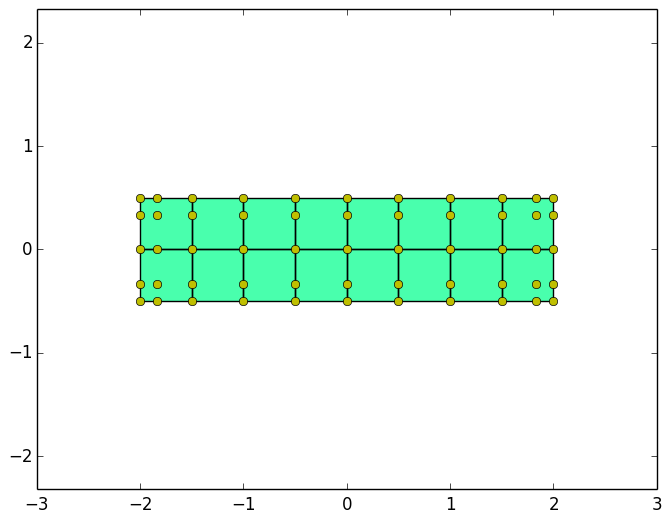

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31fe88350>

In [10]:
# particulars
p   = [1,1]                                                                  # polybnomial degree
kts = Vector{Float64}[buildvector([0.0;1.0], [p[k]+1;p[k]+1]) for k in 1:2]  # knot vector

# control points and weights
X = 2.0*[-1.0  1.0 -1.0 1.0];
Y = 0.5*[-1.0 -1.0  1.0 1.0];
W = ones(4)

# construct patch
S = NURBS(p,kts,[X[:] Y[:]],W[:])
degreeelevate!(S,2)                  # degree elevate both direction to cubics
globalrefine!(S,1,7)                 # global refine direction 1
globalrefine!(S,2,1)                 # global refine direction 1

# compute and store dependent data
S.dec = bezierdecompoperator(S)      # compute Bezier decomposition operator
S.ien = ienarray(S)                  # determine ien array

# plot geometry
plot(S,(10,10));  axis("equal"); xlim([-2.5;2.5]); grid("on")    # plot surface
plot(S.cpts[:,1], S.cpts[:,2],"yo")                              # plot nodal data

### The IEN-array is given by:

In [11]:
S.ien

16x16 Array{Int64,2}:
  1   2   3   4   5   6   7   8  12  13  14  15  16  17  18  19
  2   3   4   5   6   7   8   9  13  14  15  16  17  18  19  20
  3   4   5   6   7   8   9  10  14  15  16  17  18  19  20  21
  4   5   6   7   8   9  10  11  15  16  17  18  19  20  21  22
 12  13  14  15  16  17  18  19  23  24  25  26  27  28  29  30
 13  14  15  16  17  18  19  20  24  25  26  27  28  29  30  31
 14  15  16  17  18  19  20  21  25  26  27  28  29  30  31  32
 15  16  17  18  19  20  21  22  26  27  28  29  30  31  32  33
 23  24  25  26  27  28  29  30  34  35  36  37  38  39  40  41
 24  25  26  27  28  29  30  31  35  36  37  38  39  40  41  42
 25  26  27  28  29  30  31  32  36  37  38  39  40  41  42  43
 26  27  28  29  30  31  32  33  37  38  39  40  41  42  43  44
 34  35  36  37  38  39  40  41  45  46  47  48  49  50  51  52
 35  36  37  38  39  40  41  42  46  47  48  49  50  51  52  53
 36  37  38  39  40  41  42  43  47  48  49  50  51  52  53  54
 37  38  39  40  4

### Next we define the problems specific data, such as material properties, boundary displacements and tractions, and the ID-array

In [12]:
# Hookean constitutive law
ν = 0.3
E = 10e5
λ = ν*E / ((1+ν)*(1-2ν))
μ = E   / (2*(1+ν))
D(x::Vector{Float64}) = [λ+2μ    λ  0.0
                         λ    λ+2μ  0.0;
                         0.0   0.0    μ];

# set righthandside forcing
f(x::Vector{Float64}) = zeros(2)    

# boundary displacements
g(x::Vector{Float64}) = zeros(2)

# set tractions
function h(x::Vector{Float64})
    T = [0.0; 0.0]
    if abs(x[1]-2.0) < 1e-10
        T = [10.0; 0.0]
    end
    return T
end

# set ID array
ndofs = dimsplinespace(S)
ID    = ones(Int64,2, prod(ndofs))              # initialize ID-array
ID[1, ∂(S,1,1).ien[:]] = 0                      # restrain x-direction on left boundary (dir==1,k==1) 

id = 1
for k in 1:length(ID)
    if ID[k]!=0
        ID[k] = id
        id+=1
    end
end
S.id = ID # set ID array

2x55 Array{Int64,2}:
 0  2  4  6  8  10  12  14  16  18  20  …  90  92  94  96  98  100  102  104
 1  3  5  7  9  11  13  15  17  19  21     91  93  95  97  99  101  103  105

### Solve the problem

In [25]:
# assmemble equations
K, F = assembly(S, D, f, g, h)

# compute unknown displacements
U = zeros(Float64,size(ID))
U[S.id.!=0] = K \ F;            

### Plot the deformed configuration. With factor $\alpha$ the displacement fied can be magnified.

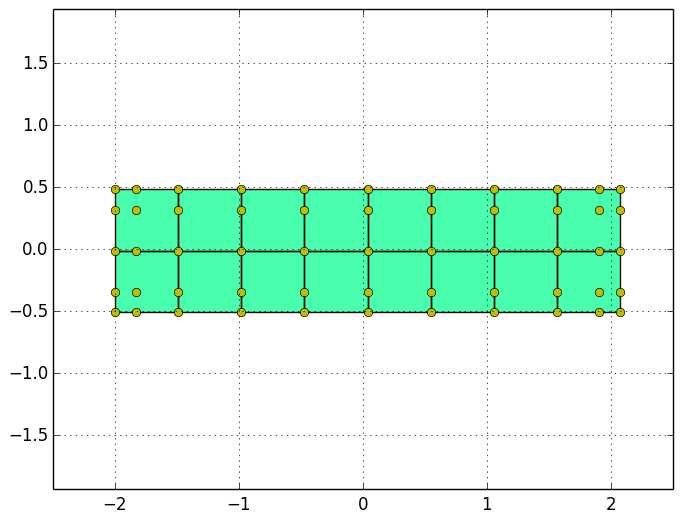

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321bb9c50>

In [26]:
α = 2000                                                     # magnification factor
G = deepcopy(S)                                              # make a copy of the initial geometry
G.cpts += α*U'                                               # update control points
plot(G,(3,3)); axis("equal"); xlim([-2.5;2.5]); grid("on")   # plot deformed configuration
plot(G.cpts[:,1], G.cpts[:,2],"yo")                          # plot nodal data

### Plot the stress componenent in direction $k$.

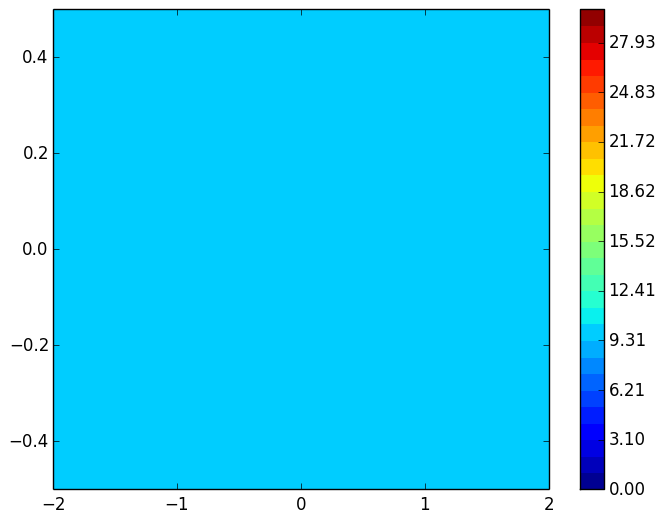

In [27]:
Sol = deepcopy(S); Sol.cpts = U'                                     # make a copy of the initial NURBS geometry
k   = 1                                                              # Choose component of stress
plot_stress_contours(S, Sol, k, linearspace(0.0,30.0,30), (10,10))   # plot the stress field

## EXAMPLE 2: Circular Arc Problem

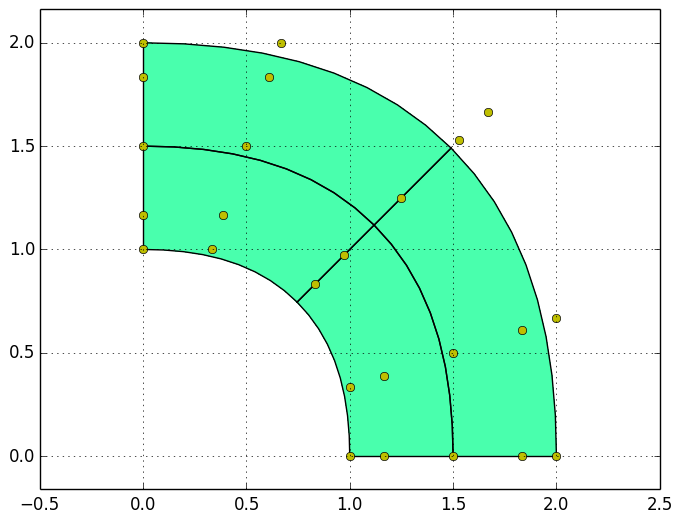

In [86]:
# particulars
p   = [2,1]                                                                  # polybnomial degree
kts = Vector{Float64}[buildvector([0.0;1.0], [p[k]+1;p[k]+1]) for k in 1:2]  # knot vector

# control points and weights
X = [0.0 0.0; 1.0 2.0; 1.0 2.0];
Y = [1.0 2.0; 1.0 2.0; 0.0 0.0];
W = [1.0 1.0; 0.5sqrt(2.0) 0.5sqrt(2.0); 1.0 1.0];

# construct patch
S = NURBS(p,kts,[X[:] Y[:]],W[:])
degreeelevate!(S,2,1)               # degree elevate the 2-direction
degreeelevate!(S,1)                 # degree elevate both directions
globalrefine!(S,1)                  # global refine both direction with 2 extra knots in each element 

# compute and store dependent data
S.dec = bezierdecompoperator(S)      # compute Bezier decomposition operator
S.ien = ienarray(S)                  # determine ien array

# plot geometry
plot(S,(10,10));                                                 # plot surface
plot(S.cpts[:,1], S.cpts[:,2],"yo")                              # plot nodal data
axis("equal"); xlim([-0.5;2.5]); ylim([-0.5;2.5]); grid("on")    # axis properties

### Next we define the problems specific data, such as material properties, boundary displacements and tractions, and the ID-array

In [56]:
# Hookean constitutive law
ν = 0.3
E = 10e5
λ = ν*E / ((1+ν)*(1-2ν))
μ = E   / (2*(1+ν))
D(x::Vector{Float64}) = [λ+2μ    λ  0.0
                         λ    λ+2μ  0.0;
                         0.0   0.0    μ];

# set righthandside forcing
f(x::Vector{Float64}) = zeros(2)    

# boundary displacements
g(x::Vector{Float64}) = zeros(2)

# set tractions
function h(x::Vector{Float64})
    T = [0.0; 0.0]
    if abs(x[2]) < 1e-10
        T = [0.0; -10.0]
    end
    return T
end

# set ID array for hole in plate problem
ndofs = dimsplinespace(S)
ID    = ones(Int64,2, prod(ndofs))              # initialize ID-array
ID[1, ∂(S,1,1).ien[:]] = 0                      # restrain x-direction on left boundary (dir==1,k==1)  
ID[2, ∂(S,1,1).ien[:]] = 0                      # restrain y-direction on left boundary (dir==1,k==1)    

id = 1
for k in 1:length(ID)
    if ID[k]!=0
        ID[k] = id
        id+=1
    end
end
S.id = ID # set ID array

2x25 Array{Int64,2}:
 0  1  3  5  7  0   9  11  13  15  0  …  25  27  29  31  0  33  35  37  39
 0  2  4  6  8  0  10  12  14  16  0     26  28  30  32  0  34  36  38  40

### Solve the problem

In [57]:
# assmemble equations
K, F = assembly(S, D, f, g, h)

# compute unknown displacements
U = zeros(Float64,size(ID))
U[S.id.!=0] = K \ F;  

### Plot the deformed configuration. With factor $\alpha$ the displacement fied can be magnified.

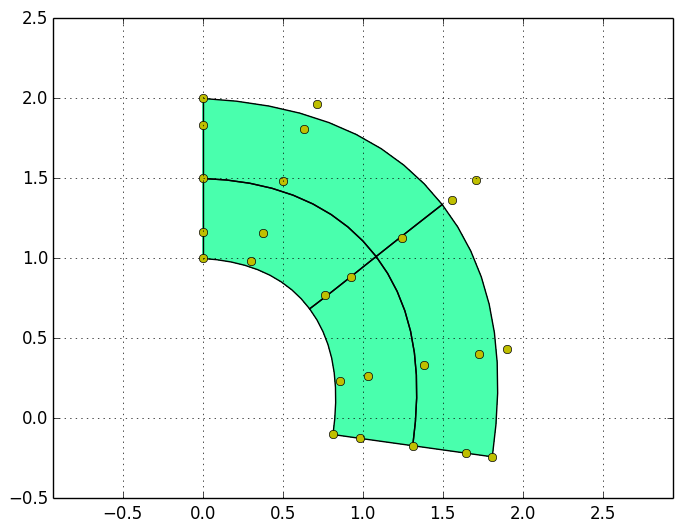

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32dbbf810>

In [62]:
α = 1000                                                      # magnification factor
G = deepcopy(S)                                               # make a copy of the initial geometry
G.cpts += α*U'                                                # update control points
plot(G,(10,10));                                              # plot deformed configuration
axis("equal"); xlim([-0.5;2.5]); ylim([-0.5;2.5]); grid("on") # axis properties
plot(G.cpts[:,1], G.cpts[:,2],"yo")                           # plot nodal data

### Plot the stress componenent in direction $k$.

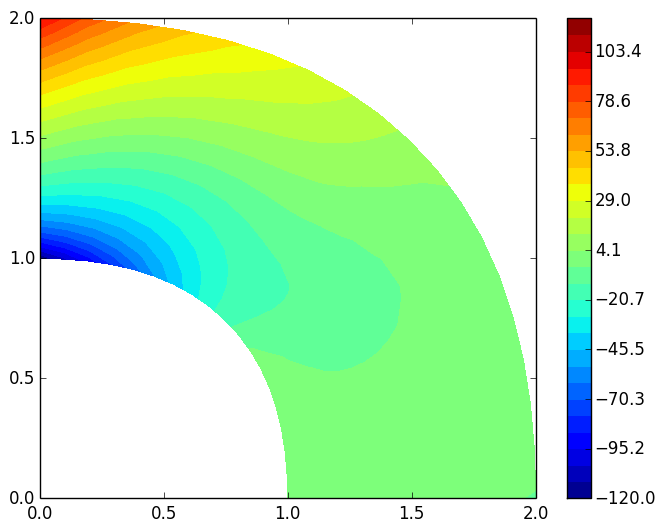

In [64]:
Sol = deepcopy(S); Sol.cpts = U'                                         # make a copy of the initial NURBS geometry
k   = 1                                                                  # Choose component of stress
plot_stress_contours(S, Sol, k, linearspace(-120.0,120.0,30), (10,10))   # plot the stress field

## EXAMPLE 3: Hole in plate problem

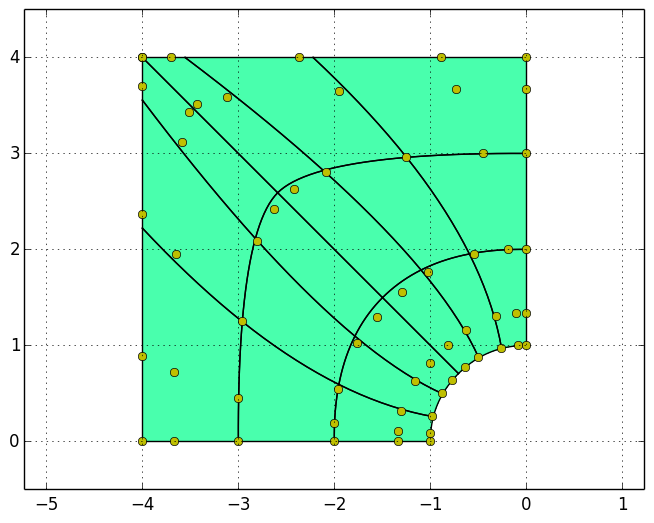

In [72]:
# particulars
p   = [2,2]                # polybnomial degree
nsd = length(p)            # number of space dimensions
kts = KnotVector[buildvector([0.0;0.5;1.0], [p[1]+1;1;p[1]+1]), buildvector([0.0;1.0], [p[2]+1;p[2]+1])]  # knot vector

# control points and weights
w = (1 + 1/sqrt(2))/2; x = sqrt(2)-1.0
X = [-1.0 -1.0  -x   0.0 -2.5 -2.5  -0.75 0.0  -4.0 -4.0 -4.0 0.0];
Y = [ 0.0   x  1.0   1.0  0.0  0.75  2.5  2.5   0.0  4.0  4.0 4.0];
W = [ 1.0   w    w   1.0  1.0  1.0   1.0  1.0   1.0  1.0  1.0 1.0];

# construct patch
S = NURBS(p,kts,[X[:] Y[:]],W[:])
degreeelevate!(S,1)                # degree elevate both directions
globalrefine!(S,2)                 # global refine both direction with 2 extra knots in each element 

# compute and store dependent data
S.dec = bezierdecompoperator(S)      # compute Bezier decomposition operator
S.ien = ienarray(S)                  # determine ien array

# plot geometry
plot(S,(10,10));                                                 # plot surface
plot(S.cpts[:,1], S.cpts[:,2],"yo")                              # plot nodal data
axis("equal"); xlim([-4.5;0.5]); ylim([-0.5;4.5]); grid("on")    # axis properties

### Next we define the problems specific data, such as material properties, boundary displacements and tractions, and the ID-array

In [74]:
# Hookean constitutive law
ν = 0.3; E = 10e5
λ = ν*E / ((1+ν)*(1-2ν))
μ = E   / (2*(1+ν))
D(x::Vector{Float64}) = [λ+2μ    λ  0.0
                         λ    λ+2μ  0.0;
                         0.0   0.0    μ];

# set righthandside forcing
f(x::Vector{Float64}) = zeros(2)      # set righthandside forcing
g(x::Vector{Float64}) = zeros(2)      # set boundary displacements

# set tractions
function h(x::Vector{Float64})
    T = [0.0; 0.0]
    if abs(x[1]+4.0) < 1e-10
        T = [-10.0; -0.0]
    end
    return T
end

# set ID array for hole in plate problem
ndofs = dimsplinespace(S)
ID    = ones(Int64,2, prod(ndofs))              # initialize ID-array
ID[2, ∂(S,1,1).ien[:]] = 0                      # restrain y-direction on bottom boundary (dir==1,k==1)  
ID[1, ∂(S,1,2).ien[:]] = 0                      # restrain x-direction on right boundary (dir==1,k==1)    

id = 1
for k in 1:length(ID)
    if ID[k]!=0
        ID[k] = id
        id+=1
    end
end
S.id = ID # set ID array

2x60 Array{Int64,2}:
 1  2  4  6  8  10  12  14  16   0  …  94  96  98  100  102  104  106    0
 0  3  5  7  9  11  13  15  17  18     95  97  99  101  103  105  107  108

### Solve the problem

In [75]:
# assmemble equations
K, F = assembly(S, D, f, g, h)

# compute unknown displacements
U = zeros(Float64,size(ID))
U[S.id.!=0] = K \ F;  

### Plot the deformed configuration. With factor $\alpha$ the displacement fied can be magnified.

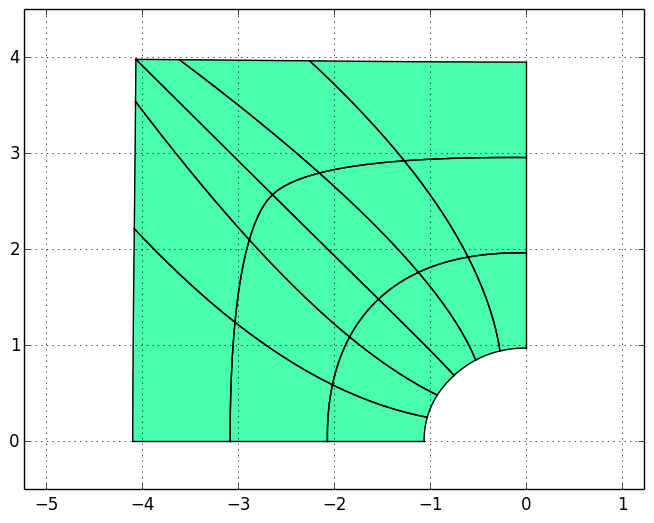

In [84]:
α = 2000                                                      # magnification factor
G = deepcopy(S)                                               # make a copy of the initial geometry
G.cpts += α*U'                                                # update control points
plot(G,(10,10));                                              # plot deformed configuration
axis("equal"); xlim([-4.5;0.5]); ylim([-0.5;4.5]); grid("on") # axis properties
# plot(G.cpts[:,1], G.cpts[:,2],"yo")                         # plot nodal data

### Plot the stress componenent in direction $k$.

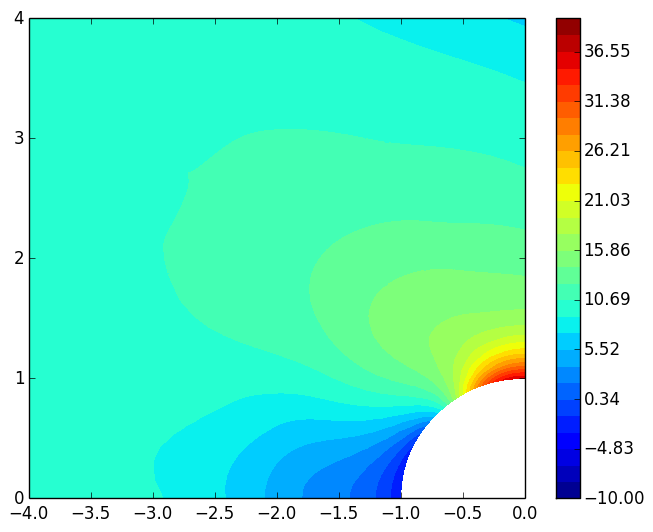

In [80]:
Sol = deepcopy(S); Sol.cpts = U'                                         # make a copy of the initial NURBS geometry
k   = 1                                                                  # Choose component of stress
plot_stress_contours(S, Sol, k, linearspace(-10.0,40.0,30), (10,10))     # plot the stress field